In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

2024-11-06 07:33:53.817049: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 1. Persiapkan Path Dataset


In [2]:
data_dir = '../../../dataset/archive/Original Images/Original Images/'


# 2. Image Data Generator untuk Preprocessing

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,       # Normalisasi gambar
    validation_split=0.2  # Split data menjadi 80% training, 20% validation
)
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),   # Sesuaikan ukuran input
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 2060 images belonging to 31 classes.
Found 502 images belonging to 31 classes.


# 3. Membangun Model ANN

In [4]:
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),          # Mengubah input gambar ke vektor 1D
    Dense(128, activation='relu'),             # Layer pertama dengan 128 neuron
    Dropout(0.5),                              # Dropout untuk mencegah overfitting
    Dense(64, activation='relu'),              # Layer kedua dengan 64 neuron
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 4. Compile Model


In [5]:
model.compile(
    optimizer=Adam(learning_rate=0.001),       # Adam optimizer
    loss='categorical_crossentropy',           # Loss untuk klasifikasi multi kelas
    metrics=['accuracy']
)

# 5. Training Model

In [6]:
history = model.fit(
    train_generator,
    epochs=10,                                 # Jumlah epoch
    validation_data=val_generator,
)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 61s 830ms/step - accuracy: 0.0403 - loss: 4.6444 - val_accuracy: 0.0418 - val_loss: 3.4298
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 65s 941ms/step - accuracy: 0.0403 - loss: 3.4312 - val_accuracy: 0.0438 - val_loss: 3.4251
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 59s 824ms/step - accuracy: 0.0379 - loss: 3.4267 - val_accuracy: 0.0418 - val_loss: 3.4208
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 50s 697ms/step - accuracy: 0.0518 - loss: 3.4214 - val_accuracy: 0.0438 - val_loss: 3.4170
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 51s 705ms/step - accuracy: 0.0381 - loss: 3.4181 - val_accuracy: 0.0438 - val_loss: 3.4134
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 50s 694ms/step - accuracy: 0.0403 - loss: 3.4130 - val_accuracy: 0.0438 - val_loss: 3.4103
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 51s 717ms/step - accuracy: 0.0274 - loss: 3.4116 - val_accuracy: 0.0438 - val_loss: 3.4075
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 50s 704ms/step - accuracy: 0.0398 - loss: 3.4065 - val_accuracy: 0.043

# 6. Evaluasi Model

In [7]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation accuracy: {val_accuracy}")
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation accuracy: {val_accuracy}")

# Confusion Matrix dan Classification Report
y_pred = np.argmax(model.predict(val_generator), axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

print("Classification Report")
print(classification_report(y_true, y_pred, labels=np.unique(y_true), target_names=class_labels))

print("Confusion Matrix")
print(confusion_matrix(y_true, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 659ms/step - accuracy: 0.0426 - loss: 3.4074
Validation accuracy: 0.043824702501297
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 724ms/step - accuracy: 0.0420 - loss: 3.3946
Validation accuracy: 0.043824702501297
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 854ms/step
Classification Report
                    precision    recall  f1-score   support

      Akshay Kumar       0.00      0.00      0.00        10
Alexandra Daddario       0.00      0.00      0.00        18
        Alia Bhatt       0.00      0.00      0.00        15
  Amitabh Bachchan       0.00      0.00      0.00        14
      Andy Samberg       0.00      0.00      0.00        18
    Anushka Sharma       0.00      0.00      0.00        13
     Billie Eilish       0.00      0.00      0.00        19
         Brad Pitt       0.00      0.00      0.00        24
    Camila Cabello       0.00      0.00      0.00        17
   Charlize Theron       0.00      0.00      0.00        15
       Claire Holt       0.00      0.00      

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

# 7. Visualisasi Hasil Training

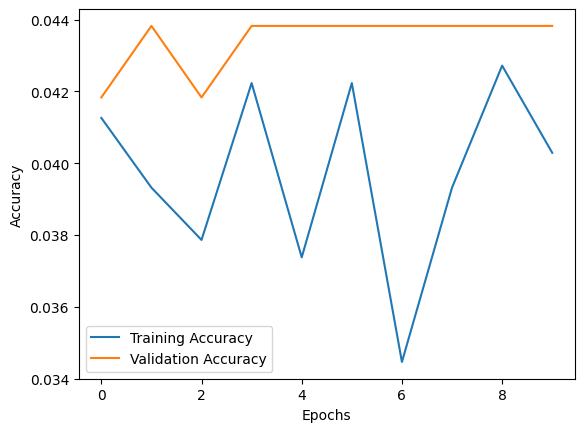

In [8]:
# 7. Visualisasi Hasil Training
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 8. Simpan Model
model.save("face_recognition_ann_model.h5")